# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    sessions_history=pd.read_csv('C:/Desktop/yandex_pract/sessions_project_history.csv')
except:
    sessions_history=pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
#data structure check
display(sessions_history.info())
display(sessions_history.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            435924 non-null  object
 1   session_id         435924 non-null  object
 2   session_date       435924 non-null  object
 3   session_start_ts   435924 non-null  object
 4   install_date       435924 non-null  object
 5   session_number     435924 non-null  int64 
 6   registration_flag  435924 non-null  int64 
 7   page_counter       435924 non-null  int64 
 8   region             435924 non-null  object
 9   device             435924 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.3+ MB


None

,session_number,registration_flag,page_counter
count,435924.000000,435924.000000,435924.000000
mean,2.382908,0.077325,3.005561
std,1.288487,0.267107,1.024625
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,2.000000,0.000000,3.000000
75%,3.000000,0.000000,4.000000
max,10.000000,1.000000,7.000000


In [4]:
#duplicated check (all)
duplicates = sessions_history[sessions_history.duplicated()]
display(duplicates.sort_values(by='user_id'))  # Вывод дублей для анализа

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device


In [5]:
#duplicated check (local)
duplicate_user_sessions = sessions_history[sessions_history.duplicated(['user_id', 'session_start_ts'], keep=False)]
display(duplicate_user_sessions.sort_values(['user_id', 'session_start_ts']))

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device


При первичном анализе данных дубликатов и пропусков не выявлено

In [6]:
# group by user_id and check unique session
user_sessions = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()
user_sessions.columns = ['user_id', 'session_count']  # Переименуем столбцы
top_user=user_sessions.sort_values('session_count', ascending=False).iloc[0]
display(sessions_history[sessions_history['user_id'] == top_user['user_id']])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [7]:
#  session_date to datetime
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

# group dy day 
daily_stats = sessions_history.groupby('session_date').agg(total_users=('user_id', 'nunique'), 
                registered_users=('registration_flag', 'sum')  # Сумма регистраций (flag=1)
                ).reset_index()

# part by registered
daily_stats['registration_rate'] = daily_stats['registered_users'] / daily_stats['total_users']
display(daily_stats)

,session_date,total_users,registered_users,registration_rate
0,2025-08-11,3919,169,0.043123
1,2025-08-12,6056,336,0.055482
2,2025-08-13,8489,464,0.054659
3,2025-08-14,10321,625,0.060556
4,2025-08-15,14065,840,0.059723
5,2025-08-16,12205,916,0.075051
6,2025-08-17,11200,833,0.074375
7,2025-08-18,10839,860,0.079343
8,2025-08-19,12118,831,0.068576
9,2025-08-20,13514,1008,0.074589


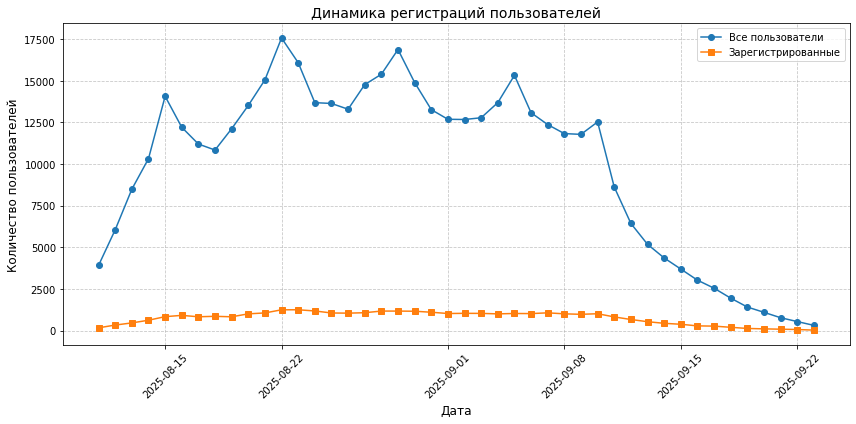

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], label='Все пользователи', marker='o')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], label='Зарегистрированные', marker='s')

plt.title('Динамика регистраций пользователей', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Из всех уникальных пользователей регистрацию проходит лишь малая часть.

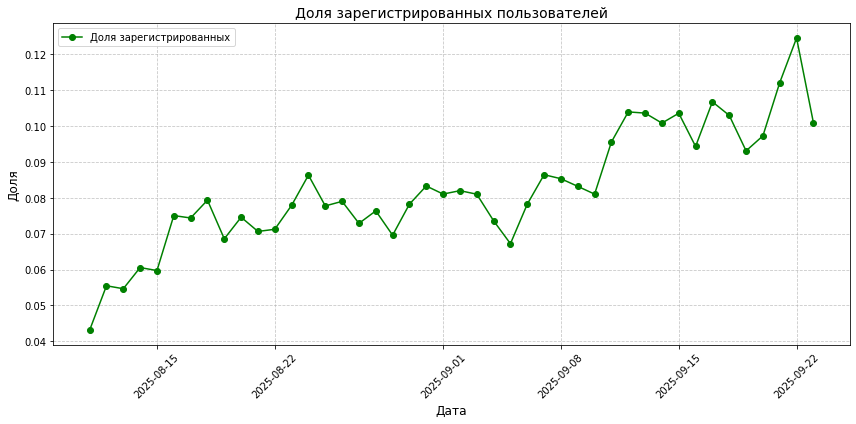

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['registration_rate'], label='Доля зарегистрированных', color='green', marker='o')

plt.title('Доля зарегистрированных пользователей', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Но в целом тренд на регистрацию положительный.

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [10]:
page_views_distribution = sessions_history['page_counter'].value_counts().sort_index().reset_index()
page_views_distribution.columns = ['page_counter', 'session_count']  # Переименовываем столбцы
display(page_views_distribution)

,page_counter,session_count
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


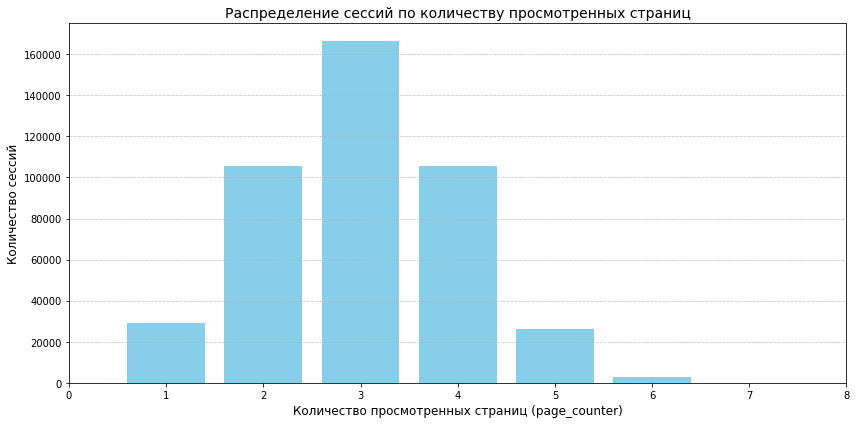

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(page_views_distribution['page_counter'], page_views_distribution['session_count'], color='skyblue')

# Настройки графика
plt.title('Распределение сессий по количеству просмотренных страниц', fontsize=14)
plt.xlabel('Количество просмотренных страниц (page_counter)', fontsize=12)
plt.ylabel('Количество сессий', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Опционально: ограничиваем ось X для лучшей читаемости (если есть выбросы)
plt.xlim(0, page_views_distribution['page_counter'].max() + 1)

plt.tight_layout()
plt.show()

Обычно пользователи просматривают около 3 страниц.

In [12]:
registered = sessions_history[sessions_history['registration_flag'] == 1]['page_counter'].value_counts().sort_index()
non_registered = sessions_history[sessions_history['registration_flag'] == 0]['page_counter'].value_counts().sort_index()

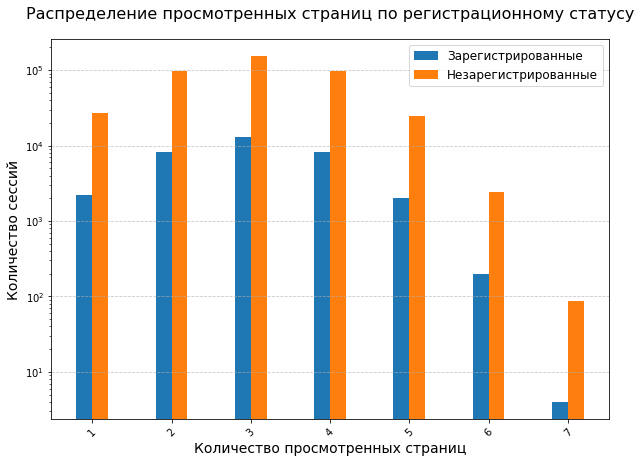

In [13]:

plt.figure(figsize=(10, 7))
bar_width = 0.2
positions = range(len(registered.index))

plt.bar([p - bar_width/2 for p in positions], 
        registered.values, 
        width=bar_width, 
        color='#1f77b4', 
        label='Зарегистрированные')
plt.bar([p + bar_width/2 for p in positions], 
        non_registered.values, 
        width=bar_width, 
        color='#ff7f0e', 
        label='Незарегистрированные')


plt.title('Распределение просмотренных страниц по регистрационному статусу', fontsize=16, pad=20)
plt.xlabel('Количество просмотренных страниц', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.xticks(positions, registered.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.yscale('log')
plt.show()


а вот тут примечательно, выходит что значительная часть юзеров незарегистрирована и пользуется приложением более активно, нежели зарегистриррованная, особенно эта разница заметна у пользователей с количеством сессий = 7.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

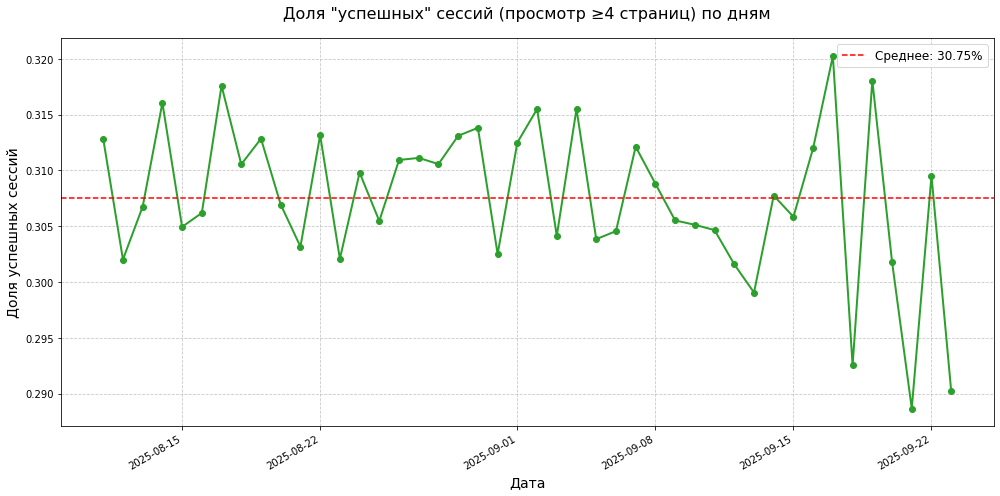

In [14]:

sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
daily_quality = sessions_history.groupby('session_date')['good_session'].agg(
    total_sessions='count',
    good_sessions='sum'
).reset_index()


daily_quality['good_sessions_ratio'] = daily_quality['good_sessions'] / daily_quality['total_sessions']


plt.figure(figsize=(14, 7))
plt.plot(daily_quality['session_date'], 
         daily_quality['good_sessions_ratio'], 
         marker='o', 
         color='#2ca02c',
         linewidth=2)

plt.title('Доля "успешных" сессий (просмотр ≥4 страниц) по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Доля успешных сессий', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)



mean_ratio = daily_quality['good_sessions_ratio'].mean()
plt.axhline(mean_ratio, color='red', linestyle='--', 
            label=f'Среднее: {mean_ratio:.2%}')
plt.legend(fontsize=12)


plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

c 08/09/25 графи ведет себя более хаотично, доля успешных сессий скорее падает чем растет, возможно есть проблемы с контентом или с доступом к нему.

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [15]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05       # Уровень значимости (5%)
beta = 0.2         # Вероятность ошибки II рода (20%)
power = 0.8        # Мощность теста (1 - beta)
mde = 0.03         # Минимальный детектируемый эффект (3%)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size=mde,
    power=power,
    alpha=alpha,
    ratio=1.0)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)} пользователей")
print(f"Общий размер выборки: {2 * int(sample_size)} пользователей")

Необходимый размер выборки для каждой группы: 17441 пользователей
Общий размер выборки: 34882 пользователей


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [16]:
from math import ceil


# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users =sessions_history.groupby('session_date')['user_id'].nunique().mean()
print(f"Среднее количество уникальных пользователей в день: {avg_daily_users:.0f}")
total_sample_size = 2 *sample_size 
# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(total_sample_size / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Среднее количество уникальных пользователей в день: 9907
Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [17]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')
group_counts = sessions_test_part.groupby('test_group')['user_id'].nunique()
group_a_users = group_counts.get('A', 0)
group_b_users = group_counts.get('B', 0)

percentage_diff = 100 * abs(group_a_users - group_b_users) / group_a_users

print(f"Количество пользователей в группе A: {group_a_users}")
print(f"Количество пользователей в группе B: {group_b_users}")
print(f"Процентная разница: {percentage_diff:.2f}%")


Количество пользователей в группе A: 1477
Количество пользователей в группе B: 1466
Процентная разница: 0.74%


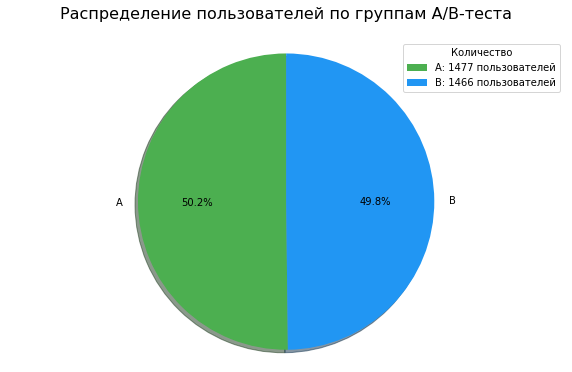

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(group_counts, 
        labels=group_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#2196F3'],  
        shadow=True)

plt.title('Распределение пользователей по группам A/B-теста', fontsize=16, pad=20)
legend_labels = [f'{group}: {count} пользователей' 
                for group, count in zip(group_counts.index, group_counts)]
plt.legend(legend_labels, title="Количество", loc="best")
plt.axis('equal')

plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [19]:
a = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique()
b = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique()

set_a = set(a)
set_b = set(b)


common_users = set_a & set_b
num_common = len(common_users)

if num_common == 0:
    print("Нет пользователей, попавших в обе группы")
else:
    print(f"Найдено {num_common} пользователей в обеих группах")



Нет пользователей, попавших в обе группы


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


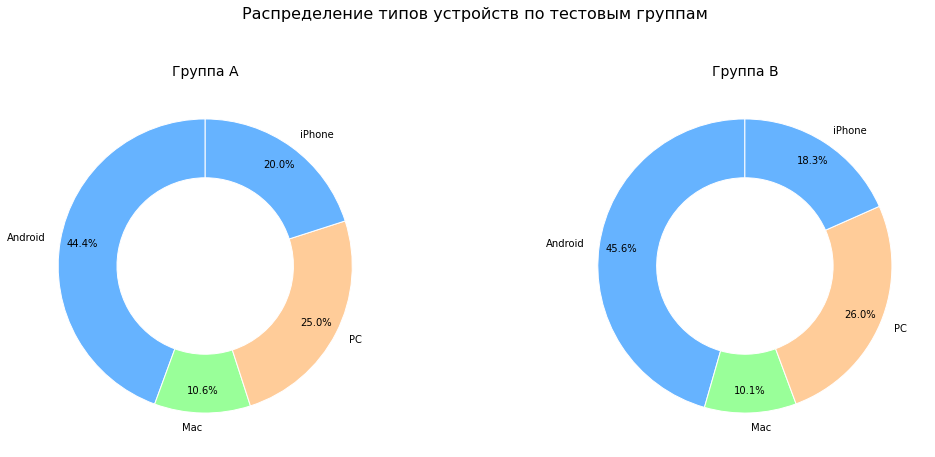

In [20]:
device_dist = sessions_test_part.groupby(['test_group', 'device'])['user_id'].nunique().unstack()
device_dist_percent = device_dist.div(device_dist.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Распределение типов устройств по тестовым группам', fontsize=16, y=1.05)

# График для группы A
device_dist_percent.loc['A'].plot(
    kind='pie',
    ax=ax1,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99'],
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.85
)
ax1.set_title('Группа A', fontsize=14)
ax1.set_ylabel('') 

# График для группы B
device_dist_percent.loc['B'].plot(
    kind='pie',
    ax=ax2,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99'],
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.85
)
ax2.set_title('Группа B', fontsize=14)
ax2.set_ylabel('')


plt.tight_layout()
plt.show()



#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


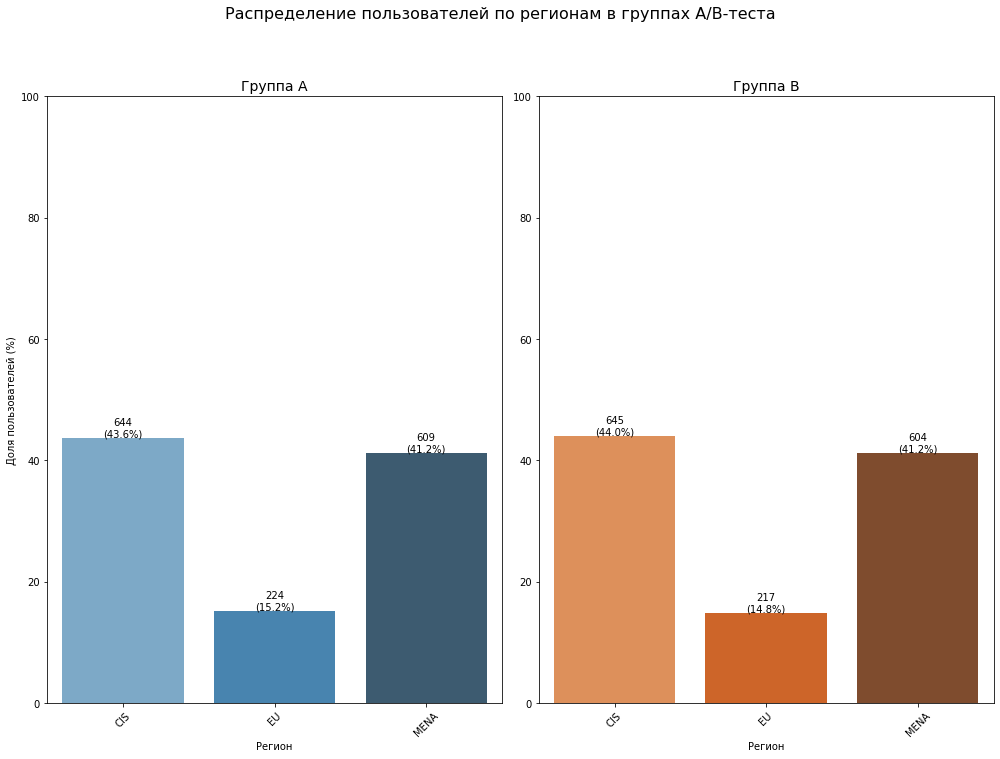

In [21]:
import seaborn as sns
region_dist = sessions_test_part.groupby(['test_group', 'region'])['user_id'].nunique().unstack()


region_dist_percent = region_dist.div(region_dist.sum(axis=1), axis=0) * 100


plt.figure(figsize=(14, 10))
plt.suptitle('Распределение пользователей по регионам в группах A/B-теста', y=1.05, fontsize=16)

# График для группы A
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=region_dist_percent.loc['A'].index, 
                 y=region_dist_percent.loc['A'].values,
                 palette='Blues_d')
plt.title('Группа A', fontsize=14)
plt.xlabel('Регион')
plt.ylabel('Доля пользователей (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for p, count in zip(ax1.patches, region_dist.loc['A']):
    ax1.annotate(f'{count}\n({p.get_height():.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# График для группы B
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=region_dist_percent.loc['B'].index, 
                 y=region_dist_percent.loc['B'].values,
                 palette='Oranges_d')
plt.title('Группа B', fontsize=14)
plt.xlabel('Регион')
plt.ylabel('')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for p, count in zip(ax2.patches, region_dist.loc['B']):
    ax2.annotate(f'{count}\n({p.get_height():.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.tight_layout()
plt.show()


#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

В группах наблюдается небольшая разница в количестве человек, но эта разница незначительная (менее 5%):

Количество пользователей в группе A: 1477
Количество пользователей в группе B: 1466
Процентная разница: 0.74%

Выборки являются независимыми, пересечений не обнаружено.

Также сохраняется однородность выборок, люди примерно равно распределены в обоих выборках в зависимости от региона и девайса, которым они пользуются.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [22]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
display(sessions_test.head())


print("\nРаспределение метрики good_session:")
print(sessions_test['good_session'].value_counts(normalize=True).mul(100).round(1))

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0



Распределение метрики good_session:
0    68.7
1    31.3
Name: good_session, dtype: float64


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

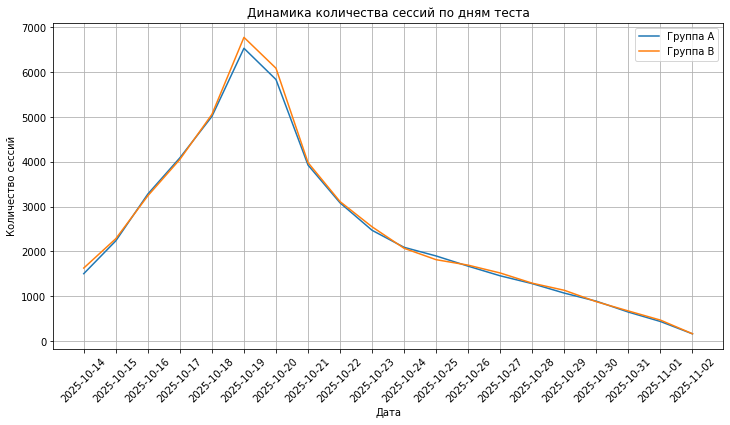

Результат t-теста:
Статистика = -0.0780
p-value = 0.9382

Нет статистически значимых различий в количестве сессий между группами (p > 0.05)
Тест проведен корректно, группы сопоставимы по трафику


In [23]:
from scipy.stats import ttest_ind


daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().unstack()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sessions, x=daily_sessions.index, y='A', label='Группа A')
sns.lineplot(data=daily_sessions, x=daily_sessions.index, y='B', label='Группа B')
plt.title('Динамика количества сессий по дням теста')
plt.ylabel('Количество сессий')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

t_stat, p_value = ttest_ind(daily_sessions['A'], daily_sessions['B'], equal_var=False)

print(f"Результат t-теста:\nСтатистика = {t_stat:.4f}\np-value = {p_value:.4f}")

if p_value > 0.05:
    print("\nНет статистически значимых различий в количестве сессий между группами (p > 0.05)")
    print("Тест проведен корректно, группы сопоставимы по трафику")
else:
    print("\nЕсть статистически значимые различия (p ≤ 0.05)")
    print("Группы не сбалансированы по количеству сессий")

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

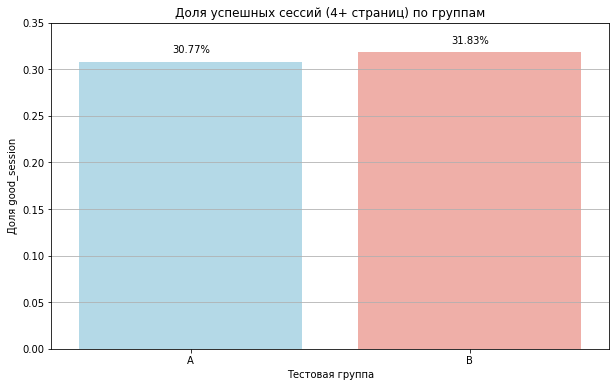

Результаты сравнения:
Группа A: 30.77%
Группа B: 31.83%
Абсолютная разница: 0.0106
Относительная разница: 3.43%

Статистическая значимость:
Z-статистика: -3.6027
p-value: 0.0003

Вывод: Различие статистически значимое. Группа B показала лучший результат.


In [24]:
from statsmodels.stats.proportion import proportions_ztest


group_stats = sessions_test.groupby('test_group')['good_session'].agg(['sum', 'count', 'mean'])
group_stats.columns = ['successes', 'total', 'conversion_rate']
diff = group_stats.loc['B', 'conversion_rate'] - group_stats.loc['A', 'conversion_rate']
rel_diff = diff / group_stats.loc['A', 'conversion_rate'] * 100
successes = [group_stats.loc['A', 'successes'], group_stats.loc['B', 'successes']]
nobs = [group_stats.loc['A', 'total'], group_stats.loc['B', 'total']]
z_stat, p_value = proportions_ztest(successes, nobs)

plt.figure(figsize=(10, 6))
sns.barplot(x=group_stats.index, y=group_stats['conversion_rate'], 
            palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Доля успешных сессий (4+ страниц) по группам')
plt.ylabel('Доля good_session')
plt.xlabel('Тестовая группа')
plt.ylim(0, group_stats['conversion_rate'].max() * 1.1)

for i, rate in enumerate(group_stats['conversion_rate']):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center')

plt.grid(axis='y')
plt.show()


print(f"Результаты сравнения:\n"
      f"Группа A: {group_stats.loc['A', 'conversion_rate']:.2%}\n"
      f"Группа B: {group_stats.loc['B', 'conversion_rate']:.2%}\n"
      f"Абсолютная разница: {diff:.4f}\n"
      f"Относительная разница: {rel_diff:.2f}%\n\n"
      f"Статистическая значимость:\n"
      f"Z-статистика: {z_stat:.4f}\n"
      f"p-value: {p_value:.4f}")


if p_value < 0.05:
    if diff > 0:
        print("\nВывод: Различие статистически значимое. Группа B показала лучший результат.")
    else:
        print("\nВывод: Различие статистически значимое. Группа A показала лучший результат.")
else:
    print("\nВывод: Различия не являются статистически значимыми (p > 0.05).")

Абсолютный прирост конверсии: +1.06 п.п.
Относительное улучшение: +3.43%
пы.сы. в задании имеется ответ на предыдущий вопрос..


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [25]:
if p_value < 0.05:
    print("Обнаружено статистически значимое улучшение (p < 0.05)")
    print(f"Вероятность ложноположительного результата: {p_value:.4%}")
else:
    print("Статистически значимых различий не обнаружено")

Обнаружено статистически значимое улучшение (p < 0.05)
Вероятность ложноположительного результата: 0.0315%


Статистическая значимость подтверждена,и судя по предыдущему заданию есть прирост конверсии пользоавателей (1.06 процентных пункта)

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

### Характеристики теста
Тест длился 20 дней,наверно, лучше продлить тест, чтобы убедиться в стабильности полученного эффекта и независимости его от сезонных колебаний.

В тесте были задействованы две группы:

- Количество пользователей в контрольной группе A: 1477
- Количество пользователей в тестовой группе B: 1466

Группы однородные, нет значительных разниц в регионах и девайсах испыытуемых.

Конверсия в успешные сессии:
- Группа A: 30.77%
- Группа B: 31.83%
- Абсолютный прирост: +1.06 процентных пункта
- Относительный прирост: +3.43%
- p-value = 0.0003 (0.03%)
- Z-статистика = -3.60

### Вывод:

p-value < 0.05 следовательно различие статистически значимое.
Новый алгоритм достоверно увеличил долю успешных сессий.

### Рекомендации:

Внедрить новый алгоритм рекомендаций, так как:
Подтверждена статистическая значимость 
Есть практический эффект (+1.06 п.п. конверсии)
